In [13]:
'''Importing Libraries'''

'Importing Libraries'

In [ ]:
import numpy as np;
import pandas as pd;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.grid_search import GridSearchCV;
from sklearn.metrics import accuracy_score;
from sklearn.model_selection import train_test_split;
import matplotlib.pyplot as plt; 
from sklearn.decomposition import PCA;
from sklearn.metrics import confusion_matrix;
import seaborn as sns;
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis;
import warnings;
warnings.filterwarnings("ignore");
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.model_selection import StratifiedKFold;
from sklearn.model_selection import cross_val_score;
from sklearn.ensemble import GradientBoostingClassifier;

In [14]:
'''Importing Data'''

'Importing Data'

In [ ]:
ziptest  = np.loadtxt("C:\\Users\\mpucci\\Desktop\\ziptest.csv")
ziptrain = np.loadtxt("C:\\Users\\mpucci\\Desktop\\ziptrain.csv")

In [15]:
'''Model 1: PCA with LDA'''

'Model 1: PCA with LDA'

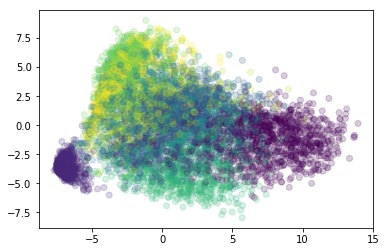

In [3]:
pca = PCA(n_components=50)
# remove the first column (image label)
pca.fit(ziptrain[:, 1:])

Z0 = pca.fit_transform(ziptrain[:,1:])
Z1 = pca.transform(ziptest[:,1:])

plt.scatter(Z0[:,0], Z0[:,1], c= ziptrain[:,0], alpha=0.2)


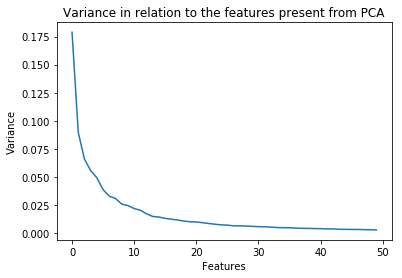

In [4]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Features")
plt.ylabel("Variance")
plt.title("Variance in relation to the features present from PCA")
plt.show()

In [5]:
## n=50 features appears to be where variance tapers off. Therefore we will use n=50 PCA components

In [6]:
pca_ldascores = []
list_n = []

for n in range(10,100,5):
    list_n.append(n)

for n in range(10,100,5):
    
    pca = PCA(n_components=n)
    # remove the first column (image label)
    pca.fit(ziptrain[:, 1:])

    Z0 = pca.fit_transform(ziptrain[:,1:])
    Z1 = pca.transform(ziptest[:,1:])

    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis()


    y= ziptrain[:,0]         # test real y values
    y_values = ziptest[:,0]  # validation real y values

    lda.fit(Z0,y)                   #LDA FIT
    predictions = lda.predict(Z1)   #LDA Predictions
    y_hat = predictions

    score = (accuracy_score(y_values, y_hat))
    pca_ldascores.append(score)
    print(score)
    
    

0.7937219730941704
0.8385650224215246
0.8545092177379173
0.8679621325361235
0.8699551569506726
0.8679621325361235
0.8749377179870453
0.8739412057797707
0.8769307424015944
0.8774289985052317
0.8759342301943199
0.877927254608869
0.8784255107125062
0.8789237668161435
0.8789237668161435
0.8794220229197808
0.8814150473343298
0.8809167912306926


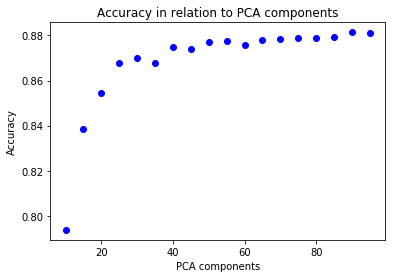

In [7]:
plt.plot(list_n,pca_ldascores,'bo')
plt.xlabel('PCA components')
plt.ylabel('Accuracy')
plt.title("Accuracy in relation to PCA components")
plt.show();

In [8]:
#Confirmation that n=50 is valid with respect to the output accuracy

pca = PCA(n_components=50)
# remove the first column (image label)
pca.fit(ziptrain[:, 1:])
Z0 = pca.fit_transform(ziptrain[:,1:])
Z1 = pca.transform(ziptest[:,1:])

# In sample accuracy
accuracy_lda = []
for i in range(0,30,1):
    value = cross_val_score(lda, Z0, ziptrain[:,0], cv=10).mean()
    accuracy_lda.append(value)
    
array_lda = np.array(accuracy_lda)
print (np.mean(array_lda))



#1 time accuracy score from LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


y= ziptrain[:,0]         # test real y values
y_values = ziptest[:,0]  # validation real y values

lda.fit(Z0,y)                   #LDA FIT
predictions = lda.predict(Z1)   #LDA Predictions
y_hat = predictions

score = (accuracy_score(y_values, y_hat))

print(score)

print ("The maximum accuracy is achieved with roughly 50 PCA components,"+" "+ "the value is"+ " "+ str(0.8764))


0.9144073863133746
0.8784255107125062
The maximum accuracy is achieved with roughly 50 PCA components, the value is 0.8764


In [9]:
'''Model 2 PCA with QDA'''

'Model 2 PCA with QDA'

In [10]:
pca_qdascores = []
list_n = []

for n in range(10,100,5):
    list_n.append(n)

for n in range(10,100,5):
    
    pca = PCA(n_components=n)
    # remove the first column (image label)
    pca.fit(ziptrain[:, 1:])

    Z0 = pca.fit_transform(ziptrain[:,1:])
    Z1 = pca.transform(ziptest[:,1:])

    qda = QuadraticDiscriminantAnalysis()

    y= ziptrain[:,0]         # test real y values
    y_values = ziptest[:,0]  # validation real y values

    qda.fit(Z0,y)                   #QDA FIT
    predictions = qda.predict(Z1)   #QDA Predictions
    y_hat = predictions

    score = (accuracy_score(y_values, y_hat))
    pca_qdascores.append(score)

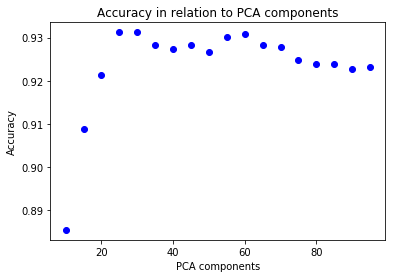

In [11]:
plt.plot(list_n,pca_qdascores,'bo')
plt.xlabel('PCA components')
plt.ylabel('Accuracy')
plt.title("Accuracy in relation to PCA components")
plt.show();

In [12]:
# Here we see the PCA components have a larger varying effect on the accruacy of classifiying out of sample data.

In [13]:
pca = PCA(n_components=30)
# remove the first column (image label)
pca.fit(ziptrain[:, 1:])

Z0 = pca.fit_transform(ziptrain[:,1:])
Z1 = pca.transform(ziptest[:,1:])
qda = QuadraticDiscriminantAnalysis()

# In sample accuracy
accuracy_qda = []
for i in range(0,30,1):
    value = cross_val_score(qda, Z0, ziptrain[:,0], cv=10).mean()
    accuracy_lda.append(value)
    
array_lda = np.array(accuracy_lda)
print (np.mean(array_lda))

#OOS accuracy with PCA and QDA model
qda.fit(Z0,y)                   #QDA FIT
predictions = qda.predict(Z1)   #QDA Predictions
y_hat = predictions
score = (accuracy_score(y_values, y_hat))
print(score) 

0.9421180960055833
0.9322371699053313


In [14]:
print ("The maximum accuracy in sample is achieved with roughly 30 PCA components,"+" "+ "the value is"+ " "+ str(0.9147))
print ("The maximum accuracy out of sample is achieved with roughly 30 PCA components,"+" "+ "the value is"+ " "+ str(0.9312))

The maximum accuracy in sample is achieved with roughly 30 PCA components, the value is 0.9147
The maximum accuracy out of sample is achieved with roughly 30 PCA components, the value is 0.9312


In [15]:
#Training set 
ziptrain_X = ziptrain[:,1:]
ziptrain_y = ziptrain[:,0]

#Splitting into training set and validation set(test in this context is for validation set) 
X_train, X_test, y_train, y_test = train_test_split(ziptrain_X, ziptrain_y, test_size = 0.2, random_state=1,shuffle=True)

print(X_train.shape)
print(y_train.shape)

(5832, 256)
(5832,)


In [16]:
'''Model 3: RandomForestClassifier'''

'Model 3: RandomForestClassifier'

In [16]:
# Constructing a dictionary of parameters - will be passed into gridsearchCV
# Criterion of entropy chosen: Partion data into subsets with similar homogeneity. Entropy is a measure of disorder therefore nodes
# that represent similar entropy values will represent similar order. 

rfc = RandomForestClassifier()

parameters = {
    "max_depth": [i for i in range(2,10,2)],
    "criterion":['entropy'],
    "max_features":["sqrt"],
    "n_estimators":[i for i in range(50,250,50)],
    #'verbose':[(2)]                                                        # Used for logging - visual construction of tree
    }

rfc_model = GridSearchCV(rfc, parameters, cv=10)


In [17]:
rfc_model.fit(X_train, y_train)
print(rfc_model.best_params_) 

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}


In [18]:
rfc = RandomForestClassifier(max_depth=8,max_features="sqrt",criterion="entropy",n_estimators=150)
rfc.fit(X_train, y_train)
y_hat = rfc.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.9588759424263193


In [20]:
rfc = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score
accuracy_scores = []
recall_scores = []
precision_scores=[]

for i in range(0,30,1):
    value = cross_val_score(rfc, X_train, y_train, cv=10).mean()
    accuracy_scores.append(value)

for i in range(0,30,1):
    value = cross_val_score(rfc, X_train, y_train, cv=10,scoring="recall_weighted").mean()
    recall_scores.append(value)
    
for i in range(0,30,1):
    value = cross_val_score(rfc, X_train, y_train, cv=10,scoring="precision_weighted").mean()
    precision_scores.append(value)

recall_array = np.array(recall_scores)
recallscores = np.mean(recall_array)
print (recallscores)

precision_array = np.array(precision_scores)
precisionscores = np.mean(precision_array)

print (precisionscores)

#Out of Sample Data - Used for Out of sample accuracy. 
ziptest_y = ziptest[:,0]
ziptest_X = ziptest[:,1:]

scores_array = np.array(accuracy_scores)
mean_is_score = (scores_array.mean())
mean_insample_score = round(mean_is_score,3)
print(mean_insample_score*100)

import statsmodels.stats.api as sms
confidence_interval = sms.DescrStatsW(scores_array).zconfint_mean()
print (confidence_interval)                                           #Confidence Interval for accuracy level of significance of 5%. 

y_hat = rfc_model.predict(ziptest_X)

oos_accuracyscore = (accuracy_score(ziptest_y, y_hat))
accuracy_score(ziptest_y, y_hat)
oos_accuracy = round(oos_accuracyscore,3)
print(oos_accuracy*100)

0.9404103898437545
0.9403972028253432
93.89999999999999
(0.9383158960662615, 0.9398282351834307)
93.0


In [21]:
test_scores = [] 
for n in range(5,30,1):
    rfc = RandomForestClassifier(max_depth=n,max_features="sqrt",criterion="entropy",n_estimators=150)
    rfc.fit(X_train, y_train)
    y_hat = rfc.predict(X_test)
    score = (accuracy_score(y_test, y_hat))
    test_scores.append(score)

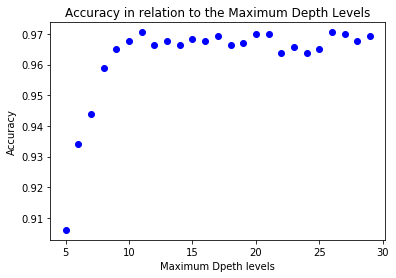

In [22]:
list_n = []

for n in range(5,30,1):
    list_n.append(n)

plt.plot(list_n,test_scores,'bo')
plt.xlabel("Maximum Dpeth levels")
plt.ylabel("Accuracy")
plt.title("Accuracy in relation to the Maximum Depth Levels")
plt.show()

In [23]:
# One can see that the accuracy plateau's approximately at a depth of 8 levels


In [24]:
'''Model 4: Gradient Boosting Classifier'''

'Model 4: Gradient Boosting Classifier'

In [25]:
gbc = GradientBoostingClassifier()

insample_scoreGradient = []

#Training set 
ziptrain_X = ziptrain[:,1:]
ziptrain_y = ziptrain[:,0]

#Splitting Training set and validation set
X_train, X_test, y_train, y_test = train_test_split(ziptrain_X, ziptrain_y, test_size = 0.2, random_state=1,shuffle=True)

#Model 4: Gradient Boosting Classifier: Using the same features obtained from gridSearchCV from RandomForestClassifier
gradboost = GradientBoostingClassifier(n_estimators= 200,max_depth=8,max_features="sqrt", random_state=1)
gradboost.fit(X_train, y_train)
y_hat = gradboost.predict(X_test)
insample_score = accuracy_score(y_test, y_hat)

print("Insample accuracy score for Gradient Boosting Classifier")
print(insample_score)

#Interesting conclusion - Insample accuracy increases with Gradient Boosting Classifier

for i in range(0,30,1):
    score = cross_val_score(gradboost, X_train, y_train, cv=10).mean()
    insample_scoreGradient.append(score)

array_gradient = np.array(insample_scoreGradient)
print(np.mean(array_gradient))

Insample accuracy score for Gradient Boosting Classifier
0.9643591501028101
0.9638197195718151


In [5]:

######### This block takes too long to compute - code displayed for reference however ##############

#accuracy_scores = []
#recall_scores = []
#precision_scores=[]

#for i in range(0,30,1):
    #value = cross_val_score(gbc, X_train, y_train, cv=10).mean()
    #accuracy_scores.append(value)

#for i in range(0,30,1):
    #value = cross_val_score(gbc, X_train, y_train, cv=10,scoring="recall_weighted").mean()
    #recall_scores.append(value)
    
#for i in range(0,30,1):
  #  value = cross_val_score(gbc, X_train, y_train, cv=10,scoring="precision_weighted").mean()
  #  precision_scores.append(value)

#recall_array = np.array(recall_scores)
#recallscores = np.mean(recall_array)
#print (recallscores)

#precision_array = np.array(precision_scores)
#precisionscores = np.mean(precision_array)

#print (precision_scores)

#####################################################################################################




In [10]:
gradboost = GradientBoostingClassifier()

insample_scoreGradient = []

#Training set 
ziptrain_X = ziptrain[:,1:]
ziptrain_y = ziptrain[:,0]

#Testing set
#Out of Sample Data - Used for Out of sample accuracy. 
ziptest_y = ziptest[:,0]
ziptest_X = ziptest[:,1:]

#Splitting Training set and validation set
X_train, X_test, y_train, y_test = train_test_split(ziptrain_X, ziptrain_y, test_size = 0.2, random_state=1,shuffle=True)

#Model 4: Gradient Boosting Classifier: Using the same features obtained from gridSearchCV from RandomForestClassifier
gradboost = GradientBoostingClassifier(n_estimators= 200,max_depth=8,max_features="sqrt", random_state=1)
gradboost.fit(X_train, y_train)

y_hat = gradboost.predict(ziptest_X)

oos_accuracyscore = (accuracy_score(ziptest_y, y_hat))
accuracy_score(ziptest_y, y_hat)
oos_accuracy = round(oos_accuracyscore,3)
print(oos_accuracy*100)
 

93.4


In [ ]:
#Comments:

#1. GridSearchCV: Why did I select GridSearchCV to find optimal tuning parameters 
    
    #GridsearchCV was used as I wanted to iterate over tunig parameters that were going to be inputted as attributes 
    #in my randomforestclassifier. GridSearchCV will otimize tunning parameters over a parameter grid, which i made
    #by making a dictionary with key value pairs corresponding to the inputs of the RandomForestClassifier. 
    
#2.  #recall weighted, precision weighted
     #Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, 
     #while recall (also known as sensitivity) is the fraction of relevant instances that have been retrieved over the total 
     #amount of relevant instances. Here we use weighted recall and weighted precision since we would like the weights of the 
     #false positives and so on be based on the weight of each class - Source: towardsdatascience.com. 

#3. Summarize the 4 models
    
    # a) PCA with LDA: Out of sample Accuracy = 87.3%
    # b) PCA with QDA: Out of sample Accuracy = 93.2%
    # c) RandomForestClassifier: Out of sample Accuracy = 93.0%
    # d) GradientBoostedClassifier: Out of sample Accuracy = 93.4% 
    
#Conclusion: After conducting 4 different models to determine which model produces the best out of sample accuracy,
# It was determined that the GradientBoosted Classifier performs best in terms of accuracy, however, the computational time
# required to obtain an output, requires a powerful PC if one desires to obtain feasible computational times. Therefore,
#I would suggest using PCA with QDA in order to classify the zipcode data. The computational time and out of sample accuracy
# are both accruate and reasonable. 